   # Plotting with Plotly

   Put your Parallel Coordinates plotting knowledge to use by using the plot to visaulize and analyze the relationship between sales, foreclosures, and year for Allgehany County in Pennsylvania.

In [5]:
import plotly.express as px
import pandas as pd
from pathlib import Path

   ### Prep Data for Calculating Total Number of Sales and Foreclosures

In [6]:
# Read in data
sales = pd.read_csv(
    Path("../../Resources/allegheny_sales.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="SALEDATE",
).dropna()

foreclosures = pd.read_csv(
    Path("../../Resources/allegheny_foreclosures.csv"),
    infer_datetime_format=True,
    parse_dates=True,
    index_col="filing_date",
).dropna()

# Slice data and get the count of instances by year
foreclosures_grp_cnt = (
    foreclosures[["amount"]].groupby([foreclosures.index.year]).count()
)
sales_grp_cnt = sales[["PRICE"]].groupby([sales.index.year]).count()

# Rename columns to be 'num_sales' and 'num_foreclosures'
sales_grp_cnt.columns = ["num_sales"]
foreclosures_grp_cnt.columns = ["num_foreclosures"]

In [7]:
# Concatenate data
sales_foreclosures_cnt = (
    pd.concat([sales_grp_cnt, foreclosures_grp_cnt], axis=1).dropna().reset_index()
)
sales_foreclosures_cnt.head()

,index,num_sales,num_foreclosures
0,2012,85.0,2893
1,2013,93.0,2841
2,2014,97.0,2676
3,2015,108.0,2431
4,2016,102.0,2163


   ### Plot data

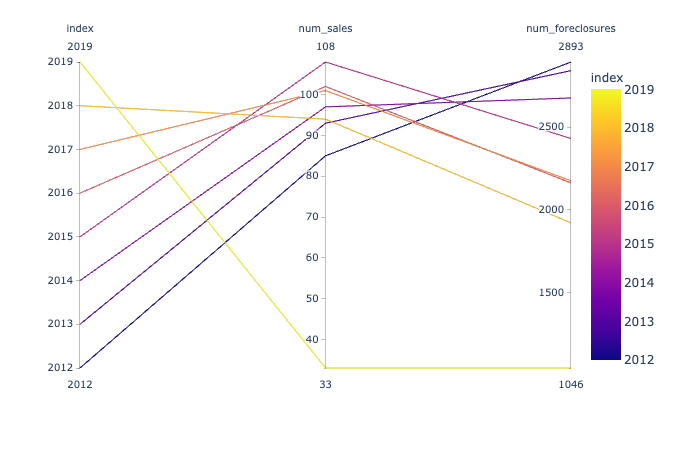

In [8]:
# Plot data using parallel_coordinates plot
px.parallel_coordinates(sales_foreclosures_cnt, color='index')

   ### Prep Data for Calculating Total Number of Sales and Foreclosures

In [9]:
# Group data and calculate total amount in foreclosures and sales by year
sales_grp_sum = sales[["PRICE"]].groupby([sales.index.year]).sum()
foreclosures_grp_sum = (
    foreclosures[["municipality", "amount"]].groupby([foreclosures.index.year]).sum()
)

# Rename columns to 'amount_from_sales' and 'amount_from_foreclosures'
sales_grp_sum.columns = ["amount_from_sales"]
foreclosures_grp_sum.columns = ["amount_from_foreclosures"]

In [10]:
# Concatenate sums
sales_foreclosures_sum = (
    pd.concat([sales_grp_sum, foreclosures_grp_sum], axis=1).dropna().reset_index()
)

   ### Plot data



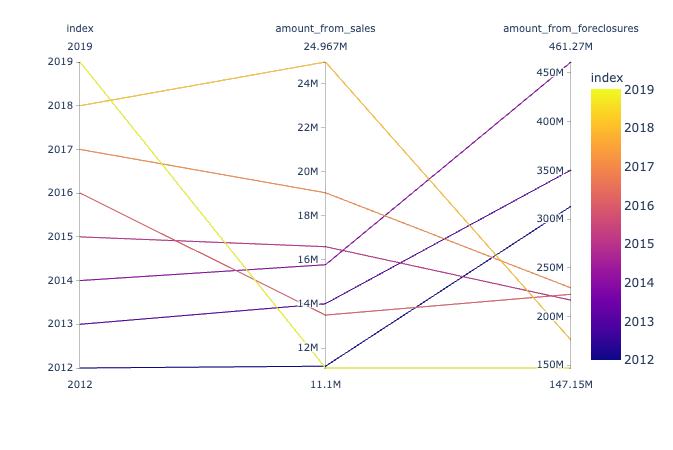

In [11]:
# Plot data using parallel_coordinates plot
px.parallel_coordinates(sales_foreclosures_sum, color='index')